# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
xlsx = pd.ExcelFile('data\European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [3]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[ 926 4877 7604 5469]
 [5389 5938 5771 4959]
 [1034 1523 9684 5106]
 ...
 [2457 1117 6120 7750]
 [7292 5350  331 2609]
 [1927 3896 8785 3395]]

Evolution:
Generation =  0 	Best fitness =  398804203490.6775
Generation =  1 	Best fitness =  230726644009.86816
Generation =  2 	Best fitness =  230726644009.86816
Generation =  3 	Best fitness =  204372991255.7452
Generation =  4 	Best fitness =  204372991255.7452
Generation =  5 	Best fitness =  182659898731.673
Generation =  6 	Best fitness =  161043211825.8706
Generation =  7 	Best fitness =  121911088379.41151
Generation =  8 	Best fitness =  71097804664.62196
Generation =  9 	Best fitness =  49749054590.54395
Generation =  10 	Best fitness =  46849843815.97494
Generation =  11 	Best fitness =  45016009308.64498
Generation =  12 	Best fitness =  36359640013.79483
Generation =  13 	Best fitness =  28535582958.48055
Generation =  14 	Best fitness =  24694600774.31946
Generation =  15 	Best fitness 

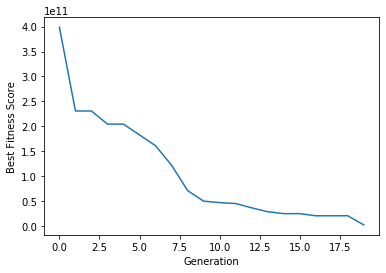

In [4]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [5]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0;
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    draw_index = np.random.choice(len(fitness), size=num_parents, replace=True, p=fitness/np.sum(fitness))
    return pop[draw_index,:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        recombination_point = np.random.randint(0,offspring_size[1])
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        if np.random.rand() > 0.5:
            random_value = np.random.randint(-100, 100, 1)
            random_index = np.random.randint(0,offspring_recombination.shape[1],1)
            offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


The population of the first generation: 
[[1979 4417 2243  921]
 [1858 6275 6302  930]
 [5496 7783 4702 1570]
 ...
 [7885 3270 8343 4997]
 [3665 5523 5321 1847]
 [1783 6378  524  830]]

Evolution:
Generation =  0 	Best fitness =  29217554194.77384
Generation =  1 	Best fitness =  11047086700.70514
Generation =  2 	Best fitness =  8978187491.23824
Generation =  3 	Best fitness =  5226078141.02072
Generation =  4 	Best fitness =  5226078141.02072
Generation =  5 	Best fitness =  5038390517.02621
Generation =  6 	Best fitness =  3563239002.93816
Generation =  7 	Best fitness =  2591071406.82476
Generation =  8 	Best fitness =  2591071406.82476
Generation =  9 	Best fitness =  1422254072.88798
Generation =  10 	Best fitness =  1185654543.76661
Generation =  11 	Best fitness =  1139869013.13615
Generation =  12 	Best fitness =  350882683.28844
Generation =  13 	Best fitness =  284147273.82559
Generation =  14 	Best fitness =  178639755.09627
Generation =  15 	Best fitness =  178639755.09627

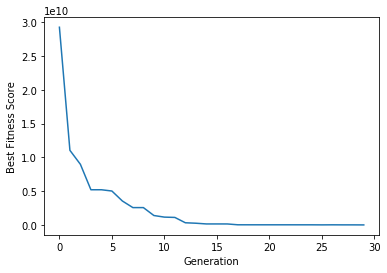

In [6]:
# GA Parameters
formula_degree = 4
number_of_solutions = 1000
number_of_parents = 500
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 30
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
# previous_fitness_mean = np.inf
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
#     if previous_fitness_mean < 1.05*np.mean(fitness):
#         break
#     previous_fitness_mean = np.mean(fitness)

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in Assignment 21X.

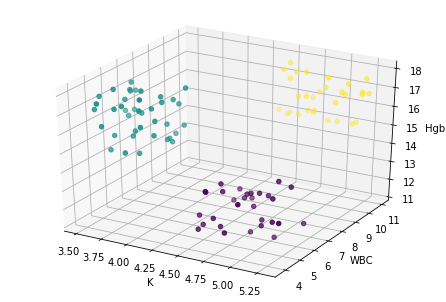

In [7]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('data\EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Challenge 232
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [8]:
from sklearn.metrics import calinski_harabasz_score as ch_score

In [9]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        fitness.append(ch_score(data,pop[solution]))
    return fitness

def biased_selection(pop, fitness, num_parents):
    draw_index = np.random.choice(len(fitness), size=num_parents, replace=False, p=fitness/np.sum(fitness))
    return pop[draw_index,:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        recombination_point = np.random.randint(0,offspring_size[1])
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(low=0, high=np.max(offspring_recombination[idx,:]))
        random_index = np.random.randint(0,offspring_recombination.shape[1])
        offspring_recombination[idx, random_index] = random_value
    return offspring_recombination


(600, 100)
The population of the first generation: 
[[1. 3. 0. ... 4. 3. 3.]
 [0. 1. 0. ... 0. 2. 0.]
 [2. 2. 3. ... 3. 3. 0.]
 ...
 [3. 2. 0. ... 1. 2. 1.]
 [2. 3. 1. ... 2. 1. 1.]
 [0. 2. 0. ... 2. 1. 0.]]

Evolution:
Generation =  0 	Best fitness =  7.030111784626261
Generation =  1 	Best fitness =  7.030111784626261
Generation =  2 	Best fitness =  7.058367486532687
Generation =  3 	Best fitness =  7.058367486532687
Generation =  4 	Best fitness =  7.058367486532687
Generation =  5 	Best fitness =  7.058367486532687
Generation =  6 	Best fitness =  7.058367486532687
Generation =  7 	Best fitness =  7.058367486532687
Generation =  8 	Best fitness =  7.058367486532687
Generation =  9 	Best fitness =  9.636417903731937
Generation =  10 	Best fitness =  9.636417903731937
Generation =  11 	Best fitness =  9.636417903731937
Generation =  12 	Best fitness =  9.636417903731937
Generation =  13 	Best fitness =  9.636417903731937
Generation =  14 	Best fitness =  10.006567373368593
Generatio

Generation =  152 	Best fitness =  103.1898194303809
Generation =  153 	Best fitness =  103.1898194303809
Generation =  154 	Best fitness =  101.03063814275528
Generation =  155 	Best fitness =  101.7210387097213
Generation =  156 	Best fitness =  112.49340364575002
Generation =  157 	Best fitness =  112.49340364575002
Generation =  158 	Best fitness =  127.71629716302397
Generation =  159 	Best fitness =  127.71629716302397
Generation =  160 	Best fitness =  127.71629716302397
Generation =  161 	Best fitness =  102.56351289129081
Generation =  162 	Best fitness =  112.45546106051609
Generation =  163 	Best fitness =  119.50815161528486
Generation =  164 	Best fitness =  119.50815161528486
Generation =  165 	Best fitness =  119.50815161528486
Generation =  166 	Best fitness =  119.50815161528486
Generation =  167 	Best fitness =  112.59408254056419
Generation =  168 	Best fitness =  109.38178354432483
Generation =  169 	Best fitness =  109.38178354432483
Generation =  170 	Best fitness

Generation =  306 	Best fitness =  293.9546699695729
Generation =  307 	Best fitness =  293.9546699695729
Generation =  308 	Best fitness =  293.9546699695729
Generation =  309 	Best fitness =  293.9546699695729
Generation =  310 	Best fitness =  293.9546699695729
Generation =  311 	Best fitness =  293.9546699695729
Generation =  312 	Best fitness =  293.9546699695729
Generation =  313 	Best fitness =  293.9546699695729
Generation =  314 	Best fitness =  293.9546699695729
Generation =  315 	Best fitness =  293.9546699695729
Generation =  316 	Best fitness =  298.19242279335293
Generation =  317 	Best fitness =  298.19242279335293
Generation =  318 	Best fitness =  298.19242279335293
Generation =  319 	Best fitness =  298.19242279335293
Generation =  320 	Best fitness =  298.19242279335293
Generation =  321 	Best fitness =  298.19242279335293
Generation =  322 	Best fitness =  295.23160491348233
Generation =  323 	Best fitness =  295.23160491348233
Generation =  324 	Best fitness =  295

Generation =  460 	Best fitness =  286.6748674657207
Generation =  461 	Best fitness =  286.6748674657207
Generation =  462 	Best fitness =  283.171495075236
Generation =  463 	Best fitness =  271.3836791598641
Generation =  464 	Best fitness =  271.3836791598641
Generation =  465 	Best fitness =  271.3836791598641
Generation =  466 	Best fitness =  276.24382164733754
Generation =  467 	Best fitness =  276.24382164733754
Generation =  468 	Best fitness =  276.24382164733754
Generation =  469 	Best fitness =  293.9546699695729
Generation =  470 	Best fitness =  271.3836791598641
Generation =  471 	Best fitness =  276.24382164733754
Generation =  472 	Best fitness =  271.3836791598641
Generation =  473 	Best fitness =  286.41421089174275
Generation =  474 	Best fitness =  280.4644353123558
Generation =  475 	Best fitness =  277.9078069755286
Generation =  476 	Best fitness =  277.9078069755286
Generation =  477 	Best fitness =  277.9078069755286
Generation =  478 	Best fitness =  277.907

Generation =  614 	Best fitness =  262.2239826557093
Generation =  615 	Best fitness =  262.2239826557093
Generation =  616 	Best fitness =  271.6660147787214
Generation =  617 	Best fitness =  271.6660147787214
Generation =  618 	Best fitness =  271.6660147787214
Generation =  619 	Best fitness =  271.6660147787214
Generation =  620 	Best fitness =  271.6660147787214
Generation =  621 	Best fitness =  271.6660147787214
Generation =  622 	Best fitness =  273.82902616126313
Generation =  623 	Best fitness =  273.82902616126313
Generation =  624 	Best fitness =  273.82902616126313
Generation =  625 	Best fitness =  273.82902616126313
Generation =  626 	Best fitness =  287.7654592758724
Generation =  627 	Best fitness =  273.82902616126313
Generation =  628 	Best fitness =  273.82902616126313
Generation =  629 	Best fitness =  273.82902616126313
Generation =  630 	Best fitness =  273.82902616126313
Generation =  631 	Best fitness =  273.82902616126313
Generation =  632 	Best fitness =  27

Generation =  767 	Best fitness =  291.89531415181625
Generation =  768 	Best fitness =  291.89531415181625
Generation =  769 	Best fitness =  291.89531415181625
Generation =  770 	Best fitness =  295.23160491348233
Generation =  771 	Best fitness =  295.23160491348233
Generation =  772 	Best fitness =  291.89531415181625
Generation =  773 	Best fitness =  291.89531415181625
Generation =  774 	Best fitness =  284.3222542620685
Generation =  775 	Best fitness =  287.1745239263356
Generation =  776 	Best fitness =  284.3222542620685
Generation =  777 	Best fitness =  284.3222542620685
Generation =  778 	Best fitness =  284.3222542620685
Generation =  779 	Best fitness =  284.3222542620685
Generation =  780 	Best fitness =  284.3222542620685
Generation =  781 	Best fitness =  284.3222542620685
Generation =  782 	Best fitness =  284.3222542620685
Generation =  783 	Best fitness =  284.3222542620685
Generation =  784 	Best fitness =  284.3222542620685
Generation =  785 	Best fitness =  284.

Generation =  921 	Best fitness =  308.16502312365765
Generation =  922 	Best fitness =  308.16502312365765
Generation =  923 	Best fitness =  308.16502312365765
Generation =  924 	Best fitness =  295.3603607308873
Generation =  925 	Best fitness =  295.3603607308873
Generation =  926 	Best fitness =  308.16502312365765
Generation =  927 	Best fitness =  308.16502312365765
Generation =  928 	Best fitness =  308.16502312365765
Generation =  929 	Best fitness =  308.16502312365765
Generation =  930 	Best fitness =  308.16502312365765
Generation =  931 	Best fitness =  293.9546699695729
Generation =  932 	Best fitness =  293.9546699695729
Generation =  933 	Best fitness =  293.9546699695729
Generation =  934 	Best fitness =  293.9546699695729
Generation =  935 	Best fitness =  293.9546699695729
Generation =  936 	Best fitness =  293.9546699695729
Generation =  937 	Best fitness =  293.9546699695729
Generation =  938 	Best fitness =  293.9546699695729
Generation =  939 	Best fitness =  293

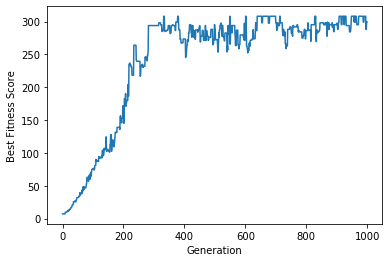

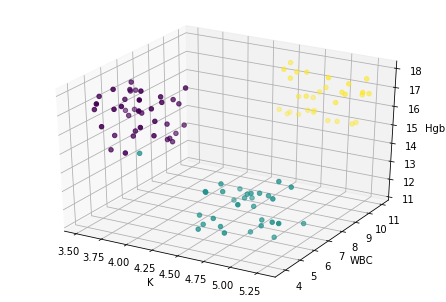

In [25]:
# GA Parameters
max_number_of_clusters = 6
number_of_solutions = 600
number_of_parents = 300
population_size = (number_of_solutions, EMR3d1.shape[0]) 
number_of_generations = 1000
best_outputs = []
new_population = np.empty(population_size)

data = EMR3d1

# Genesis
for i in range(number_of_solutions):
    new_population[i] = np.random.randint(low=0, high=np.random.randint(low=2, high=max_number_of_clusters), 
                                          size=(1,population_size[1]))
    
print(new_population.shape)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", np.max(fitness))
    best_outputs.append(np.max(fitness))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], EMR3d1.shape[0]))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx[0], :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

make_chart(EMR3d1, np.squeeze(new_population[best_match_idx[0][-1], :]), variables1)

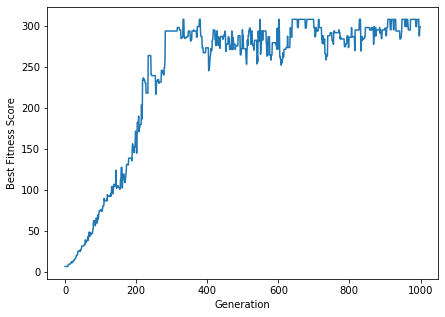

In [33]:
# Chart
plt.figure(figsize=(7,5))
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

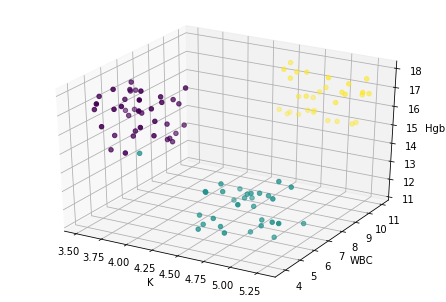

In [27]:
make_chart(EMR3d1, np.squeeze(new_population[best_match_idx[0][-1], :]), variables1)

## Challenge 233: Reconstruct Image (Bonus)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('data\pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [ ]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [ ]:
# Your code here